![title](edel.JPG)

# Edelweiss Hackathon-Machine Learning

## Predict Price Movement

### Broad Objective

To predict short term (intraday) price movement of various stocks on the basis of its price and combination of multiple features provided.

### Data Provided:
We have provided historical 5-min tick data for a universe of more than 150 stocks. The data has the following features:

* **Mid_Price:** The price over which the returns need to be calculated
* **Date and Time**
* **46 anonymized features**

### Methodology

The algorithm will decide whether to take a position in a stock (buy/sell)
Returns calculated will be calculated as

* If there is no current position in any stocks  at any point;  the algorithm can either buy an stocks or sell an stocks ; If the stock is bought it’s called a long position, and if the stock is sold its called a short position

* If there is a long position, the algo can only square-off the position: It means it will sell the current long position and become position neutral.

* If there is a short position, the algo can only square-off the position: It means it will buy  the current short position and become position neutral.

* At 3:15 PM every day the algo mandatorily should square-off any open position.

* Return should be calculated only when the positions are square-off: If the position was long the return calculated will be equal to ((exit price- entryprice)/entryprice)

* If the position was short the return calculated will be equal to ((entryprice -exit price)/entryprice)

* For any new entry with exit the “number of trades” will be equal to 1; for example if one enters underlying4 at 1:00 PM and exits at 3:15 , number of the trade for that day for that particular stock will be 1.

* Since all the price prediction needs to be done intraday , all the positions can get opened after (9:30 AM) and should exit at or before (3:15 PM)

### Output:

It should have the following information

* Stocks wise daily return (daily return(a)):  Return for any day for any stock : sum of all trades return for that day: For example : for underlying 7 : the algo enters long at 1:20 PM and square-off the position at 2:40 PM: and again goes short 2:45 and square-off at 3:15. The return for that day will be the return of two trades taken that day.

* Stocks wise number of daily trades (trades(b)) : Trades for any day for any stock : sum of all trades for that day. For example: the trades will be equal to 2, as in the above mentioned example.

### Detailed Objective:
* You have predict the Mid-price on the testing data and then build an algorithm that predicts the Buy/Sell decisions (Long/ Short positions) for the predicted Mid-prices.

* The final optimisation problem would be to maximise  of ((a)-(0.12%)*(b)) *(b), this will be the criterion for selecting the price predicting algos

However, there must be a minimum of 20 trades per stocks; averaged across stock.

# Predicting MidPrice

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input/predict-price-movement-kernel-1"))

TRAIN_PATH='../input/hackerearth-predict-price-movement-edlewiess/dataset/dataset/train/'
TEST_PATH='../input/hackerearth-predict-price-movement-edlewiess/dataset/dataset/test/'

# Any results you write to the current directory are saved as output.

['__results___files', 'custom.css', '__results__.html', '__output__.json', '__notebook__.ipynb', 'EW_mainsimplesub_v14.csv']


In [3]:
train1=pd.read_csv(TRAIN_PATH+'train1.csv')
test1=pd.read_csv(TEST_PATH+'test1.csv')
for i in [2,3]:
    train1=train1.append(pd.read_csv(TRAIN_PATH+'train'+str(i)+'.csv'))
    test1=test1.append(pd.read_csv(TEST_PATH+'test'+str(i)+'.csv'))

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (46) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
# test1.head()
# plt.figure(figsize=(18,10))
# strain[strain['Symbol']=='und_1']['MidPrice'].plot()
# plt.axhline(y=0, color='r')
# stest[stest['Symbol']=='und_1']['MidPrice'].plot()


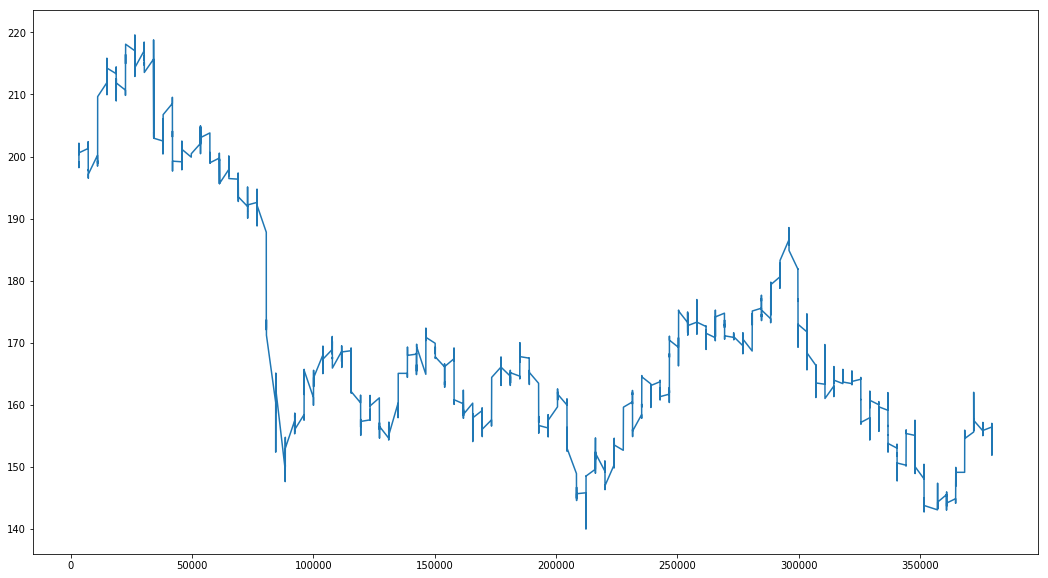

In [5]:
plt.figure(figsize=(18,10))
train1[train1['Symbol']=='und_101']['MidPrice'].plot()

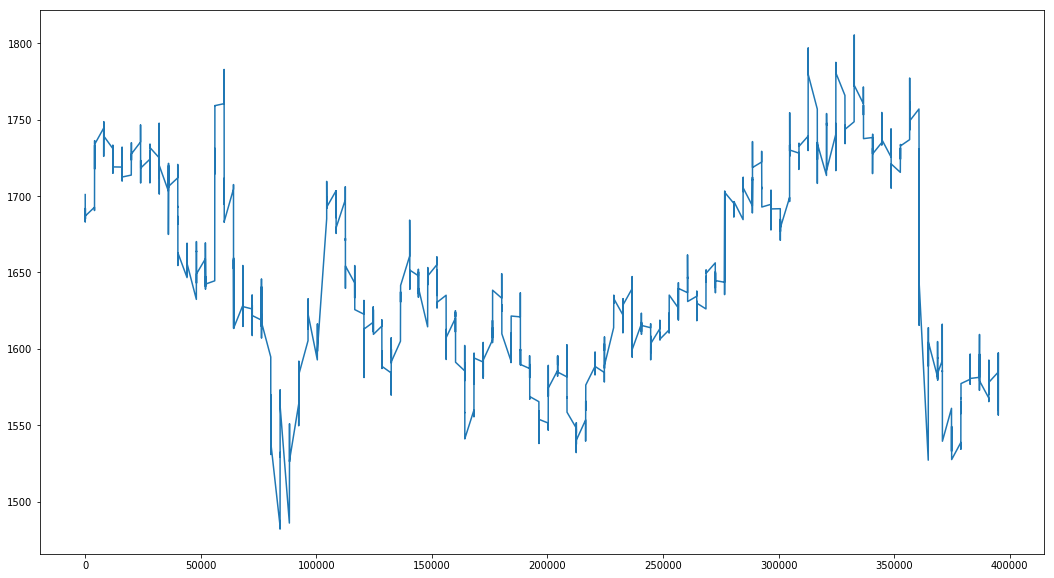

In [7]:

plt.figure(figsize=(18,10))
train1[train1['Symbol']=='und_109']['MidPrice'].plot()
# train[train['Symbol']=='und_109']

In [8]:

# plt.plot(x=pd.to_datetime(train[train['Symbol']=='und_76']['UID1']))
# train[train[train['Date']=='04-01-2015']['Symbol']=='und_76']
# train[train['Symbol']=='und_109']
plt.figure(figsize=(18,10))
train1[(train1['Date']=='04-01-2015') & (train1['Symbol']=='und_109')].tail()


,UID,Date,Time,MidPrice,Symbol,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Feature13,Feature14,Feature15,Feature16,Feature17,Feature18,Feature19,Feature20,Feature21,Feature22,Feature23,Feature24,Feature25,Feature26,Feature27,Feature28,Feature29,Feature30,Feature31,Feature32,Feature33,Feature34,Feature35,Feature36,Feature37,Feature38,Feature39,Feature40,Feature41,Feature42,Feature43,Feature44,Feature45,Feature46
68,04-01-2015 15:05 und_109,04-01-2015,15:05,1687.00,und_109,0.521429,0.430493,0.995922,0.993163,0.996994,0.993292,0.982185,0.995767,-0.319372,-0.320261,-0.289256,-0.362637,0.042491,-0.056169,-0.858730,-0.905179,0.424812,0.589147,-1.418346,-2.264107,-0.855879,0.390554,0.355309,0.343671,0.284224,0.000477,0.000207,0.000185,0.000111,0.831418,1.125331,1.086425,1.009653,1.012089,1.009117,1.023558,1.017188,1.010769,0.836150,0.945847,0.780895,1.27022,1.292517,0.576923,0.504425,0.376190
69,04-01-2015 15:10 und_109,04-01-2015,15:10,1686.95,und_109,0.515901,0.420354,0.996040,0.994170,0.996935,0.993233,0.982127,0.994860,-0.302564,-0.307692,-0.264000,-0.326316,0.054423,-0.025054,-0.799560,-0.852941,0.420074,0.575758,-1.443172,-2.331579,-0.885614,0.394629,0.361189,0.371688,0.290728,0.000425,0.000174,0.000155,0.000075,0.829529,1.029211,1.071205,0.874913,1.011773,1.008974,1.023392,1.017058,0.963521,0.794002,0.886004,0.721912,1.39175,1.272727,0.471698,0.474138,0.376812
70,04-01-2015 15:15 und_109,04-01-2015,15:15,1687.00,und_109,0.522807,0.431718,0.995084,0.992983,0.996265,0.993289,0.982185,0.995262,-0.286432,-0.283019,-0.244094,-0.298969,0.058869,-0.021156,-0.737676,-0.771930,0.428044,0.574627,-1.411774,-2.254293,-0.871040,0.405014,0.328746,0.339050,0.259314,0.000381,0.000155,0.000122,0.000056,0.841012,1.109634,1.093747,1.031654,1.010774,1.007971,1.021465,1.015586,0.942525,0.772548,0.860453,0.710536,1.11792,1.488281,0.553191,0.487179,0.382775
71,04-01-2015 15:20 und_109,04-01-2015,15:20,1689.10,und_109,0.528169,0.431718,0.997855,0.996274,0.998505,0.994331,0.984632,0.997074,-0.262626,-0.265823,-0.222222,-0.284211,0.055233,-0.023793,-0.662795,-0.711724,0.431734,0.554745,-1.394695,-2.249888,-0.890497,0.451149,0.383628,0.437757,0.382022,0.000357,0.000163,0.000142,0.000060,0.840415,1.035601,1.050892,0.773504,1.010270,1.007398,1.020796,1.014837,0.904399,0.744341,0.829980,0.678414,1.15358,1.595833,0.500000,0.466102,0.387560
72,04-01-2015 15:25 und_109,04-01-2015,15:25,1687.05,und_109,0.538462,0.442396,0.995143,0.993042,0.997054,0.993117,0.982243,0.994978,-0.260417,-0.259740,-0.203252,-0.276596,0.078571,-0.022065,-0.637295,-0.702116,0.438462,0.609756,-1.351125,-2.182988,-0.790486,0.391610,0.324690,0.354137,0.280325,0.000334,0.000136,0.000109,0.000038,0.841061,1.090456,1.153262,1.002237,1.010804,1.008032,1.022954,1.016315,0.917660,0.752850,0.813187,0.668109,1.35153,1.717647,0.471698,0.478261,0.382353


<Figure size 1296x720 with 0 Axes>

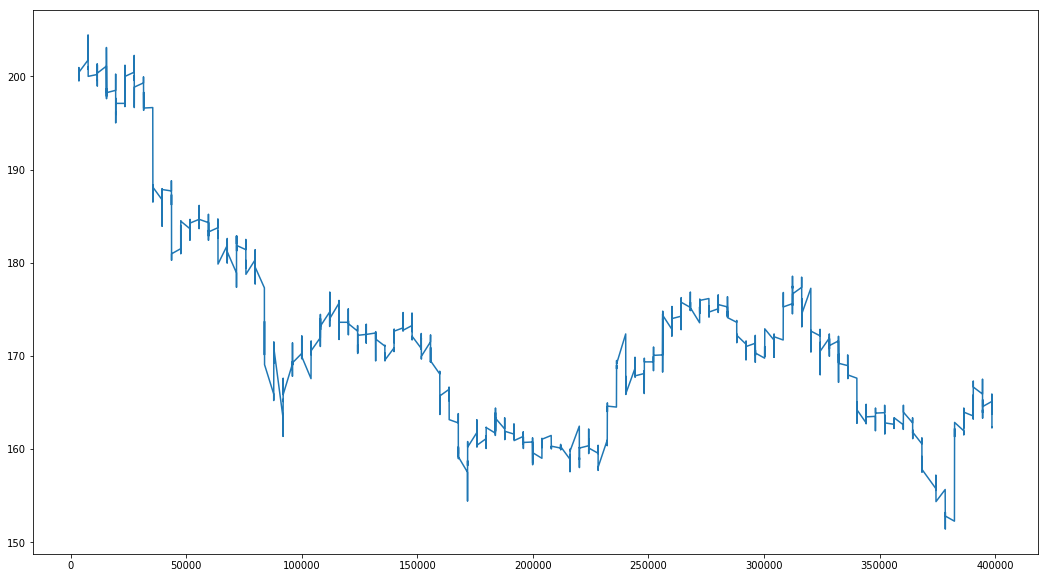

In [10]:
# train[train['Symbol']=='und_109']
plt.figure(figsize=(18,10))
train1[train1['Symbol']=='und_159']['MidPrice'].plot()

Check how many have negative values

In [13]:
f=[]
for j in train1.columns:
    if j.startswith('Feature') and j not in ['Feature42']:
        print(j,train1[train1[j]<0].shape)
        if train1[train1[j]<0].shape[0]>240676:
            f.append(j)
print(f)

Feature1 (0, 51)
Feature2 (0, 51)
Feature3 (0, 51)
Feature4 (0, 51)
Feature5 (0, 51)
Feature6 (0, 51)
Feature7 (0, 51)
Feature8 (0, 51)
Feature9 (914327, 51)
Feature10 (911827, 51)
Feature11 (832560, 51)
Feature12 (868502, 51)
Feature13 (383769, 51)
Feature14 (567954, 51)
Feature15 (893298, 51)
Feature16 (904087, 51)
Feature17 (0, 51)
Feature18 (0, 51)
Feature19 (987101, 51)
Feature20 (998361, 51)
Feature21 (962988, 51)
Feature22 (0, 51)
Feature23 (0, 51)
Feature24 (0, 51)
Feature25 (0, 51)
Feature26 (240677, 51)
Feature27 (275758, 51)
Feature28 (339185, 51)
Feature29 (463887, 51)
Feature30 (0, 51)
Feature31 (0, 51)
Feature32 (0, 51)
Feature33 (0, 51)
Feature34 (0, 51)
Feature35 (0, 51)
Feature36 (0, 51)
Feature37 (0, 51)
Feature38 (0, 51)
Feature39 (0, 51)
Feature40 (0, 51)
Feature41 (0, 51)
Feature43 (0, 51)
Feature44 (0, 51)
Feature45 (0, 51)
Feature46 (0, 51)
['Feature9', 'Feature10', 'Feature11', 'Feature12', 'Feature13', 'Feature14', 'Feature15', 'Feature16', 'Feature19', 'Featur

In [14]:
train1.head()

,UID,Date,Time,MidPrice,Symbol,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Feature13,Feature14,Feature15,Feature16,Feature17,Feature18,Feature19,Feature20,Feature21,Feature22,Feature23,Feature24,Feature25,Feature26,Feature27,Feature28,Feature29,Feature30,Feature31,Feature32,Feature33,Feature34,Feature35,Feature36,Feature37,Feature38,Feature39,Feature40,Feature41,Feature42,Feature43,Feature44,Feature45,Feature46
0,04-01-2015 09:20 und_109,04-01-2015,09:20,1701.00,und_109,0.556213,0.504202,0.996146,0.993157,1.003206,0.995698,0.996728,0.996247,-0.308824,-0.302752,-0.186813,-0.292308,0.180492,0.013714,-0.733206,-0.781319,0.482014,0.462366,-1.082274,-1.753641,-1.078707,0.501600,0.343173,0.309610,0.206452,0.000563,0.000244,0.000261,0.000130,1.008413,1.173405,1.976990,1.450977,1.012734,1.009129,1.026050,1.016019,1.053254,0.942061,0.811770,0.735862,0.452454,0.901639,0.592593,0.463768,0.373913
1,04-01-2015 09:25 und_109,04-01-2015,09:25,1696.55,und_109,0.551020,0.450704,0.997270,0.993206,0.999403,0.994075,0.962433,0.995417,-0.312500,-0.312500,-0.235294,-0.283951,0.109091,0.040043,-0.774026,-0.836580,0.660377,0.594059,-0.936508,-1.744938,-0.584546,0.478699,0.374552,0.376217,0.270891,0.000104,0.000229,0.000197,0.000070,0.548042,1.108665,1.261438,1.122638,1.012989,1.008484,1.025488,1.016547,1.051948,0.860435,0.890110,0.728061,0.704193,1.064024,0.500000,0.410959,0.445255
2,04-01-2015 09:30 und_109,04-01-2015,09:30,1699.65,und_109,0.611111,0.520548,0.995962,0.993040,1.001903,0.993944,0.965953,0.997971,-0.243902,-0.242424,-0.163636,-0.301205,0.114485,-0.078537,-0.581278,-0.726341,0.710843,0.495495,-0.775941,-1.375991,-0.609353,0.476861,0.324236,0.312375,0.216826,0.000009,0.000186,0.000171,0.000065,0.602466,1.274973,1.754310,1.141958,1.012233,1.008618,1.024957,1.016253,1.005376,0.853699,0.850242,0.724241,0.568616,1.240418,0.750000,0.594203,0.517730
3,04-01-2015 09:35 und_109,04-01-2015,09:35,1697.05,und_109,0.538462,0.441558,0.996669,0.995334,1.005164,0.993557,0.962999,0.996606,-0.312883,-0.312977,-0.181818,-0.317647,0.196095,-0.006718,-0.740154,-0.907235,0.630058,0.453704,-1.020604,-1.836325,-0.707589,0.523597,0.390531,0.403055,0.355621,0.000106,0.000242,0.000263,0.000073,0.562495,1.063779,1.979256,0.736998,1.014070,1.009994,1.028127,1.017669,1.028846,0.843867,0.777778,0.637807,0.546903,1.291815,0.500000,0.426667,0.344595
4,04-01-2015 09:40 und_109,04-01-2015,09:40,1695.40,und_109,0.598086,0.506410,0.994673,0.991444,1.002091,0.991847,0.961128,0.995751,-0.235294,-0.235294,-0.130435,-0.264368,0.150183,-0.039377,-0.523810,-0.676740,0.701149,0.570093,-0.808268,-1.420480,-0.526474,0.411008,0.320000,0.329287,0.252664,-0.000075,0.000140,0.000146,-0.000010,0.562422,1.225252,1.906995,1.046772,1.011688,1.007766,1.023151,1.015709,0.966139,0.818047,0.777512,0.658333,1.01903,1.589147,0.575758,0.554054,0.410596


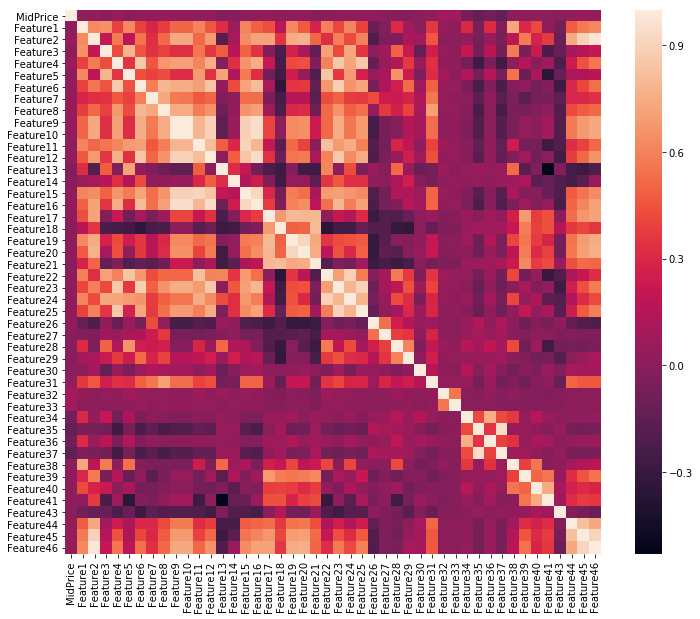

In [15]:
import seaborn as sns
plt.figure(figsize=(12,10))
sns.heatmap(train1.corr())

In [16]:
train=train1.copy()
test=test1.copy()

## Feature Engineering

In [17]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()

train['Symbol']=l.fit_transform(train['Symbol'])
test['Symbol']=l.transform(test['Symbol'])
train['mDate']=pd.to_datetime(train['Date']+' '+train['Time'],format='%d-%m-%Y %H:%M')
def ismorning(val):
    if val>='12:00':
        return 1
    else:
        return 0
train['d']=train['mDate'].dt.day.astype(np.float64)
train['month']=train['mDate'].dt.month.astype(np.float64)
train['week']=train['mDate'].dt.week.astype(np.float64)
train['min']=train['mDate'].dt.minute.astype(np.float64)
train['hr']=train['mDate'].dt.hour.astype(np.float64)
train['weekday']=train['mDate'].dt.weekday.astype(np.float64)
train['ismorning']=train['Time'].apply(ismorning)
train['ismonthstart']=train['mDate'].dt.is_month_start
train['ismonthend']=train['mDate'].dt.is_month_end

test['mDate']=pd.to_datetime(test['Date']+' '+test['Time'],format='%d-%m-%Y %H:%M')
test['d']=test['mDate'].dt.day.astype(np.float64)
test['month']=test['mDate'].dt.month.astype(np.float64)
test['week']=test['mDate'].dt.week.astype(np.float64)
test['min']=test['mDate'].dt.minute.astype(np.float64)
test['hr']=test['mDate'].dt.hour.astype(np.float64)
test['weekday']=test['mDate'].dt.weekday.astype(np.float64)
test['ismorning']=test['Time'].apply(ismorning)
test['ismonthstart']=test['mDate'].dt.is_month_start
test['ismonthend']=test['mDate'].dt.is_month_end
print(train.columns)
# r_feat=['UID','Date','mDate','Time','Feature42','Feature30','Feature31','Feature32','Feature33','Feature43','Feature9', 'Feature10',
#         'Feature11', 'Feature12', 'Feature13', 'Feature14', 'Feature15', 'Feature16', 'Feature19', 'Feature20', 'Feature21', 'Feature26', 'Feature27', 'Feature28', 'Feature29']
# r_feat=['UID','Date','mDate','Time','Feature42','Feature30','Feature31','Feature32','Feature33','Feature43']
r_feat=['UID','Date','mDate','Time','Feature42','Feature30','Feature31','Feature32','Feature33','Feature43','Feature9','Feature10',  'Feature11', 'Feature12',
        'Feature13', 'Feature14', 'Feature15', 'Feature16', 'Feature19', 'Feature20', 'Feature21', 'Feature26', 'Feature27', 'Feature28', 'Feature29']

df=train.drop(r_feat,axis=1)
dftest=test.drop(r_feat,axis=1)
X,y=df.drop('MidPrice',axis=1),df['MidPrice']

Index(['UID', 'Date', 'Time', 'MidPrice', 'Symbol', 'Feature1', 'Feature2',
       'Feature3', 'Feature4', 'Feature5', 'Feature6', 'Feature7', 'Feature8',
       'Feature9', 'Feature10', 'Feature11', 'Feature12', 'Feature13',
       'Feature14', 'Feature15', 'Feature16', 'Feature17', 'Feature18',
       'Feature19', 'Feature20', 'Feature21', 'Feature22', 'Feature23',
       'Feature24', 'Feature25', 'Feature26', 'Feature27', 'Feature28',
       'Feature29', 'Feature30', 'Feature31', 'Feature32', 'Feature33',
       'Feature34', 'Feature35', 'Feature36', 'Feature37', 'Feature38',
       'Feature39', 'Feature40', 'Feature41', 'Feature42', 'Feature43',
       'Feature44', 'Feature45', 'Feature46', 'mDate', 'd', 'month', 'week',
       'min', 'hr', 'weekday', 'ismorning', 'ismonthstart', 'ismonthend'],
      dtype='object')


In [18]:
dftest.columns

Index(['Symbol', 'Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5',
       'Feature6', 'Feature7', 'Feature8', 'Feature17', 'Feature18',
       'Feature22', 'Feature23', 'Feature24', 'Feature25', 'Feature34',
       'Feature35', 'Feature36', 'Feature37', 'Feature38', 'Feature39',
       'Feature40', 'Feature41', 'Feature44', 'Feature45', 'Feature46', 'd',
       'month', 'week', 'min', 'hr', 'weekday', 'ismorning', 'ismonthstart',
       'ismonthend'],
      dtype='object')

In [19]:
X.shape

(1157424, 35)

In [20]:

df.head()

,MidPrice,Symbol,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature17,Feature18,Feature22,Feature23,Feature24,Feature25,Feature34,Feature35,Feature36,Feature37,Feature38,Feature39,Feature40,Feature41,Feature44,Feature45,Feature46,d,month,week,min,hr,weekday,ismorning,ismonthstart,ismonthend
0,1701.00,11,0.556213,0.504202,0.996146,0.993157,1.003206,0.995698,0.996728,0.996247,0.482014,0.462366,0.501600,0.343173,0.309610,0.206452,1.012734,1.009129,1.026050,1.016019,1.053254,0.942061,0.811770,0.735862,0.592593,0.463768,0.373913,4.0,1.0,1.0,20.0,9.0,6.0,0,False,False
1,1696.55,11,0.551020,0.450704,0.997270,0.993206,0.999403,0.994075,0.962433,0.995417,0.660377,0.594059,0.478699,0.374552,0.376217,0.270891,1.012989,1.008484,1.025488,1.016547,1.051948,0.860435,0.890110,0.728061,0.500000,0.410959,0.445255,4.0,1.0,1.0,25.0,9.0,6.0,0,False,False
2,1699.65,11,0.611111,0.520548,0.995962,0.993040,1.001903,0.993944,0.965953,0.997971,0.710843,0.495495,0.476861,0.324236,0.312375,0.216826,1.012233,1.008618,1.024957,1.016253,1.005376,0.853699,0.850242,0.724241,0.750000,0.594203,0.517730,4.0,1.0,1.0,30.0,9.0,6.0,0,False,False
3,1697.05,11,0.538462,0.441558,0.996669,0.995334,1.005164,0.993557,0.962999,0.996606,0.630058,0.453704,0.523597,0.390531,0.403055,0.355621,1.014070,1.009994,1.028127,1.017669,1.028846,0.843867,0.777778,0.637807,0.500000,0.426667,0.344595,4.0,1.0,1.0,35.0,9.0,6.0,0,False,False
4,1695.40,11,0.598086,0.506410,0.994673,0.991444,1.002091,0.991847,0.961128,0.995751,0.701149,0.570093,0.411008,0.320000,0.329287,0.252664,1.011688,1.007766,1.023151,1.015709,0.966139,0.818047,0.777512,0.658333,0.575758,0.554054,0.410596,4.0,1.0,1.0,40.0,9.0,6.0,0,False,False


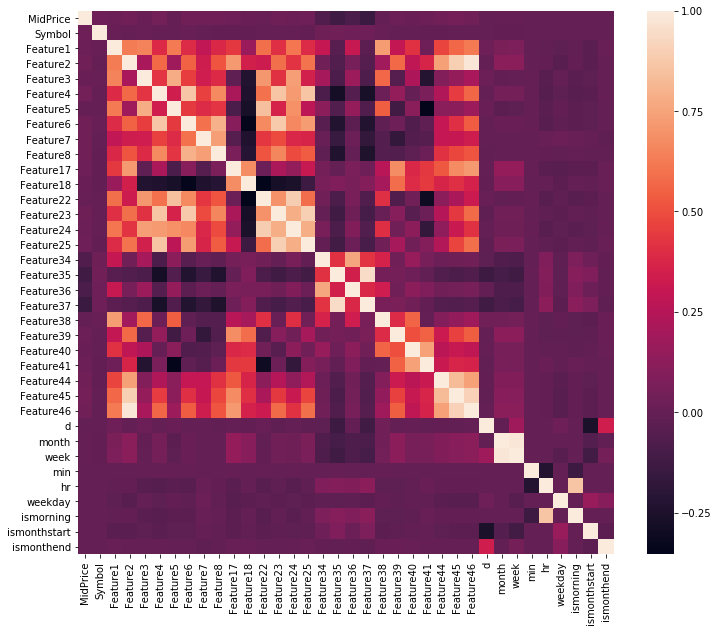

In [21]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr())

In [22]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,mean_squared_error,mean_squared_log_error
# y=train['Fees']
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.25,random_state = 1994)

categorical_features_indices = np.where(X_train.dtypes =='object')[0]
categorical_features_indices

array([], dtype=int64)

In [23]:
# X_train.isnull().sum()
from sklearn.ensemble import RandomForestRegressor
# m=RandomForestRegressor(n_estimators=100,random_state=1994)
# m.fit(X_train,y_train)
# pr=m.predict(X_val)
# # m=Rid
# # print(np.sqrt(mean_squared_log_error(np.expm1(y_val.values),np.expm1(p))))
# print(np.sqrt(mean_squared_error(y_val.values,pr)))

## Evaluation and Prediction

In [24]:
from lightgbm import LGBMRegressor
m=LGBMRegressor(n_estimators=1000,random_state=1994)
# m=RidgeCV(cv=4)
# X_traina,y_traina=augment(X_train.values, y_train.values)
# X_vala,y_vala=augment(X_val.values, y_val.values)
m.fit(X_train,y_train,eval_set=[(X_val,y_val)],eval_metric=['l1','l2','mape'],verbose=100,early_stopping_rounds=100,categorical_feature=[0,-1,-2,-3,-4,-5,-6,-7,-8,-9])
p=m.predict(X_val)
# m=Rid
# print(np.sqrt(mean_squared_log_error(np.expm1(y_val.values),np.expm1(p))))
print(np.sqrt(mean_squared_error(y_val.values,p)))
# print(rmsle_lgb(y_val.values,p))
# X=X.reset_index()
# X=X.drop('index',axis=1)
# X

# X=X.reset_index()
# X=X.drop('index',axis=1)
# X
# dftestX_tr, y_tr = augment(X_train.values, y_train.values)

/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [-9, -8, -7, -6, -5, -4, -3, -2, -1, 0]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [-9, -8, -7, -6, -5, -4, -3, -2, -1, 0]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 7213.55	valid_0's mape: 0.0398275	valid_0's l1: 39.3078	valid_0's l2: 7213.55
[200]	valid_0's l2: 3889.48	valid_0's mape: 0.0304355	valid_0's l1: 27.9021	valid_0's l2: 3889.48
[300]	valid_0's l2: 2772.61	valid_0's mape: 0.0251324	valid_0's l1: 23.3463	valid_0's l2: 2772.61
[400]	valid_0's l2: 2228.87	valid_0's mape: 0.0225213	valid_0's l1: 20.8317	valid_0's l2: 2228.87
[500]	valid_0's l2: 1860.59	valid_0's mape: 0.0205063	valid_0's l1: 18.6946	valid_0's l2: 1860.59
[600]	valid_0's l2: 1632.03	valid_0's mape: 0.018865	valid_0's l1: 17.174	valid_0's l2: 1632.03
[700]	valid_0's l2: 1490.02	valid_0's mape: 0.0176007	valid_0's l1: 16.1433	valid_0's l2: 1490.02
[800]	valid_0's l2: 1370.68	valid_0's mape: 0.016478	valid_0's l1: 15.172	valid_0's l2: 1370.68
[900]	valid_0's l2: 1265.52	valid_0's mape: 0.01563	valid_0's l1: 14.3992	valid_0's l2: 1265.52
[1000]	valid_0's l2: 1198.95	valid_0's mape: 0.0149205	valid_

In [25]:
err=[]
y_pred_tot=[]
i=0
from sklearn.model_selection import KFold,StratifiedKFold
fold=KFold(n_splits=25,shuffle=True,random_state=1994)
for train_index, test_index in fold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    rf=LGBMRegressor(n_estimators=10000,random_state=1994)
    rf.fit(X_train,y_train,eval_set=[(X_test, y_test)],eval_metric=['l1','l2','mape'],
         verbose=200,categorical_feature=[0,-1,-2,-3,-4,-5,-6,-7,-8,-9]
         , early_stopping_rounds=100
          )
    prc=rf.predict(X_test)
    print("err: ",np.sqrt(mean_squared_error(y_test,prc)))
    err.append(np.sqrt(mean_squared_error(y_test,prc)))
    p = rf.predict(dftest)
    i+=1
    y_pred_tot.append(p)

/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [-9, -8, -7, -6, -5, -4, -3, -2, -1, 0]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [-9, -8, -7, -6, -5, -4, -3, -2, -1, 0]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's l2: 3285.35	valid_0's mape: 0.0304471	valid_0's l1: 26.5448	valid_0's l2: 3285.35
[400]	valid_0's l2: 1867.4	valid_0's mape: 0.0226624	valid_0's l1: 19.805	valid_0's l2: 1867.4
[600]	valid_0's l2: 1408.94	valid_0's mape: 0.019829	valid_0's l1: 16.7975	valid_0's l2: 1408.94
[800]	valid_0's l2: 1180.38	valid_0's mape: 0.0171775	valid_0's l1: 14.7558	valid_0's l2: 1180.38
[1000]	valid_0's l2: 1018.22	valid_0's mape: 0.0154776	valid_0's l1: 13.2803	valid_0's l2: 1018.22
[1200]	valid_0's l2: 926.158	valid_0's mape: 0.014231	valid_0's l1: 12.2456	valid_0's l2: 926.158
[1400]	valid_0's l2: 861.611	valid_0's mape: 0.0132752	valid_0's l1: 11.4498	valid_0's l2: 861.611
[1600]	valid_0's l2: 813.858	valid_0's mape: 0.0125687	valid_0's l1: 10.8715	valid_0's l2: 813.858
[1800]	valid_0's l2: 779.456	valid_0's mape: 0.0120936	valid_0's l1: 10.3853	valid_0's l2: 779.456
[2000]	valid_0's l2: 744.806	valid_0's mape: 0.0114946	

/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [-9, -8, -7, -6, -5, -4, -3, -2, -1, 0]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [-9, -8, -7, -6, -5, -4, -3, -2, -1, 0]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's l2: 4181.18	valid_0's mape: 0.0302443	valid_0's l1: 28.8896	valid_0's l2: 4181.18
[400]	valid_0's l2: 2276.96	valid_0's mape: 0.0219449	valid_0's l1: 20.6834	valid_0's l2: 2276.96
[600]	valid_0's l2: 1704.7	valid_0's mape: 0.0192376	valid_0's l1: 17.6594	valid_0's l2: 1704.7
[800]	valid_0's l2: 1405.58	valid_0's mape: 0.0165479	valid_0's l1: 15.3522	valid_0's l2: 1405.58
[1000]	valid_0's l2: 1210.14	valid_0's mape: 0.0150081	valid_0's l1: 13.8325	valid_0's l2: 1210.14
[1200]	valid_0's l2: 1095.91	valid_0's mape: 0.0138059	valid_0's l1: 12.6402	valid_0's l2: 1095.91
[1400]	valid_0's l2: 1024.38	valid_0's mape: 0.0129176	valid_0's l1: 11.8936	valid_0's l2: 1024.38
[1600]	valid_0's l2: 969.268	valid_0's mape: 0.0120906	valid_0's l1: 11.2433	valid_0's l2: 969.268
[1800]	valid_0's l2: 921.251	valid_0's mape: 0.011555	valid_0's l1: 10.7337	valid_0's l2: 921.251
[2000]	valid_0's l2: 890.869	valid_0's mape: 0.011222

/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [-9, -8, -7, -6, -5, -4, -3, -2, -1, 0]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [-9, -8, -7, -6, -5, -4, -3, -2, -1, 0]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's l2: 3591.37	valid_0's mape: 0.0299411	valid_0's l1: 27.5681	valid_0's l2: 3591.37
[400]	valid_0's l2: 2039.11	valid_0's mape: 0.0217149	valid_0's l1: 20.0605	valid_0's l2: 2039.11
[600]	valid_0's l2: 1523.74	valid_0's mape: 0.0184404	valid_0's l1: 16.8313	valid_0's l2: 1523.74
[800]	valid_0's l2: 1255.05	valid_0's mape: 0.0164639	valid_0's l1: 14.8153	valid_0's l2: 1255.05
[1000]	valid_0's l2: 1098.24	valid_0's mape: 0.0151672	valid_0's l1: 13.5484	valid_0's l2: 1098.24
[1200]	valid_0's l2: 999.639	valid_0's mape: 0.0139612	valid_0's l1: 12.4886	valid_0's l2: 999.639
[1400]	valid_0's l2: 923.563	valid_0's mape: 0.0131503	valid_0's l1: 11.6792	valid_0's l2: 923.563
[1600]	valid_0's l2: 855.659	valid_0's mape: 0.0123744	valid_0's l1: 10.981	valid_0's l2: 855.659
[1800]	valid_0's l2: 819.583	valid_0's mape: 0.0119061	valid_0's l1: 10.522	valid_0's l2: 819.583
[2000]	valid_0's l2: 785.145	valid_0's mape: 0.01136

/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [-9, -8, -7, -6, -5, -4, -3, -2, -1, 0]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [-9, -8, -7, -6, -5, -4, -3, -2, -1, 0]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's l2: 3932.47	valid_0's mape: 0.029063	valid_0's l1: 28.2527	valid_0's l2: 3932.47
[400]	valid_0's l2: 2082.44	valid_0's mape: 0.0214849	valid_0's l1: 20.3767	valid_0's l2: 2082.44
[600]	valid_0's l2: 1493.77	valid_0's mape: 0.0182295	valid_0's l1: 16.9887	valid_0's l2: 1493.77
[800]	valid_0's l2: 1220.22	valid_0's mape: 0.0162446	valid_0's l1: 15.014	valid_0's l2: 1220.22
[1000]	valid_0's l2: 1064.91	valid_0's mape: 0.0148901	valid_0's l1: 13.6185	valid_0's l2: 1064.91
[1200]	valid_0's l2: 953.45	valid_0's mape: 0.0139497	valid_0's l1: 12.6219	valid_0's l2: 953.45
[1400]	valid_0's l2: 873.234	valid_0's mape: 0.0130509	valid_0's l1: 11.7206	valid_0's l2: 873.234
[1600]	valid_0's l2: 818.355	valid_0's mape: 0.0123759	valid_0's l1: 11.0926	valid_0's l2: 818.355
[1800]	valid_0's l2: 783.905	valid_0's mape: 0.0119223	valid_0's l1: 10.6195	valid_0's l2: 783.905
[2000]	valid_0's l2: 753.264	valid_0's mape: 0.0115323

/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [-9, -8, -7, -6, -5, -4, -3, -2, -1, 0]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [-9, -8, -7, -6, -5, -4, -3, -2, -1, 0]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's l2: 4177.99	valid_0's mape: 0.0296462	valid_0's l1: 28.4398	valid_0's l2: 4177.99
[400]	valid_0's l2: 2234.21	valid_0's mape: 0.0219143	valid_0's l1: 20.4012	valid_0's l2: 2234.21
[600]	valid_0's l2: 1628.89	valid_0's mape: 0.0187672	valid_0's l1: 17.1624	valid_0's l2: 1628.89
[800]	valid_0's l2: 1317.38	valid_0's mape: 0.0167454	valid_0's l1: 15.0587	valid_0's l2: 1317.38
[1000]	valid_0's l2: 1134.3	valid_0's mape: 0.0151354	valid_0's l1: 13.6149	valid_0's l2: 1134.3
[1200]	valid_0's l2: 1025.42	valid_0's mape: 0.0141619	valid_0's l1: 12.6449	valid_0's l2: 1025.42
[1400]	valid_0's l2: 938.256	valid_0's mape: 0.0135167	valid_0's l1: 11.9777	valid_0's l2: 938.256
[1600]	valid_0's l2: 877.69	valid_0's mape: 0.0128234	valid_0's l1: 11.3685	valid_0's l2: 877.69
[1800]	valid_0's l2: 817.628	valid_0's mape: 0.0119265	valid_0's l1: 10.585	valid_0's l2: 817.628
[2000]	valid_0's l2: 783.371	valid_0's mape: 0.0113401	

/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [-9, -8, -7, -6, -5, -4, -3, -2, -1, 0]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [-9, -8, -7, -6, -5, -4, -3, -2, -1, 0]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's l2: 3593.11	valid_0's mape: 0.0297514	valid_0's l1: 27.7391	valid_0's l2: 3593.11
[400]	valid_0's l2: 1801.47	valid_0's mape: 0.021696	valid_0's l1: 20.1473	valid_0's l2: 1801.47
[600]	valid_0's l2: 1273.1	valid_0's mape: 0.0184216	valid_0's l1: 16.7556	valid_0's l2: 1273.1
[800]	valid_0's l2: 1009.79	valid_0's mape: 0.0161468	valid_0's l1: 14.6471	valid_0's l2: 1009.79
[1000]	valid_0's l2: 867.241	valid_0's mape: 0.0149319	valid_0's l1: 13.2954	valid_0's l2: 867.241
[1200]	valid_0's l2: 764.791	valid_0's mape: 0.0137981	valid_0's l1: 12.2134	valid_0's l2: 764.791
[1400]	valid_0's l2: 698.836	valid_0's mape: 0.0129963	valid_0's l1: 11.4504	valid_0's l2: 698.836
[1600]	valid_0's l2: 651.578	valid_0's mape: 0.0122276	valid_0's l1: 10.7645	valid_0's l2: 651.578
[1800]	valid_0's l2: 616.947	valid_0's mape: 0.0116029	valid_0's l1: 10.2222	valid_0's l2: 616.947
[2000]	valid_0's l2: 592.45	valid_0's mape: 0.01125	v

/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [-9, -8, -7, -6, -5, -4, -3, -2, -1, 0]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [-9, -8, -7, -6, -5, -4, -3, -2, -1, 0]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's l2: 3788.12	valid_0's mape: 0.0304879	valid_0's l1: 28.1569	valid_0's l2: 3788.12
[400]	valid_0's l2: 2026.59	valid_0's mape: 0.0219357	valid_0's l1: 20.1775	valid_0's l2: 2026.59
[600]	valid_0's l2: 1486.25	valid_0's mape: 0.0189543	valid_0's l1: 16.9825	valid_0's l2: 1486.25
[800]	valid_0's l2: 1223.71	valid_0's mape: 0.0168498	valid_0's l1: 15.0565	valid_0's l2: 1223.71
[1000]	valid_0's l2: 1079.25	valid_0's mape: 0.0154743	valid_0's l1: 13.6702	valid_0's l2: 1079.25
[1200]	valid_0's l2: 978.613	valid_0's mape: 0.014454	valid_0's l1: 12.6833	valid_0's l2: 978.613
[1400]	valid_0's l2: 900.692	valid_0's mape: 0.0133925	valid_0's l1: 11.8113	valid_0's l2: 900.692
[1600]	valid_0's l2: 844.013	valid_0's mape: 0.0125162	valid_0's l1: 11.0848	valid_0's l2: 844.013
[1800]	valid_0's l2: 801.432	valid_0's mape: 0.0117768	valid_0's l1: 10.4146	valid_0's l2: 801.432
[2000]	valid_0's l2: 768.278	valid_0's mape: 0.0113

/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [-9, -8, -7, -6, -5, -4, -3, -2, -1, 0]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [-9, -8, -7, -6, -5, -4, -3, -2, -1, 0]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's l2: 3345.68	valid_0's mape: 0.0295668	valid_0's l1: 27.3507	valid_0's l2: 3345.68
[400]	valid_0's l2: 1828.33	valid_0's mape: 0.0224813	valid_0's l1: 20.2649	valid_0's l2: 1828.33
[600]	valid_0's l2: 1287.42	valid_0's mape: 0.0186845	valid_0's l1: 16.9344	valid_0's l2: 1287.42
[800]	valid_0's l2: 1015.37	valid_0's mape: 0.0162607	valid_0's l1: 14.6574	valid_0's l2: 1015.37
[1000]	valid_0's l2: 872.255	valid_0's mape: 0.015018	valid_0's l1: 13.3694	valid_0's l2: 872.255
[1200]	valid_0's l2: 774.09	valid_0's mape: 0.0135919	valid_0's l1: 12.2042	valid_0's l2: 774.09
[1400]	valid_0's l2: 705.311	valid_0's mape: 0.0129284	valid_0's l1: 11.4842	valid_0's l2: 705.311
[1600]	valid_0's l2: 648.05	valid_0's mape: 0.0122701	valid_0's l1: 10.7878	valid_0's l2: 648.05
[1800]	valid_0's l2: 613.227	valid_0's mape: 0.0115894	valid_0's l1: 10.2596	valid_0's l2: 613.227
[2000]	valid_0's l2: 585.191	valid_0's mape: 0.0112259	

/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [-9, -8, -7, -6, -5, -4, -3, -2, -1, 0]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [-9, -8, -7, -6, -5, -4, -3, -2, -1, 0]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's l2: 4015.56	valid_0's mape: 0.0314411	valid_0's l1: 28.8207	valid_0's l2: 4015.56
[400]	valid_0's l2: 2216.64	valid_0's mape: 0.0220521	valid_0's l1: 20.2706	valid_0's l2: 2216.64
[600]	valid_0's l2: 1662.62	valid_0's mape: 0.0185248	valid_0's l1: 16.8924	valid_0's l2: 1662.62
[800]	valid_0's l2: 1381.5	valid_0's mape: 0.0162042	valid_0's l1: 14.7193	valid_0's l2: 1381.5
[1000]	valid_0's l2: 1250.42	valid_0's mape: 0.0147717	valid_0's l1: 13.4375	valid_0's l2: 1250.42
[1200]	valid_0's l2: 1147.21	valid_0's mape: 0.013721	valid_0's l1: 12.4413	valid_0's l2: 1147.21
[1400]	valid_0's l2: 1064.08	valid_0's mape: 0.0131022	valid_0's l1: 11.7428	valid_0's l2: 1064.08
[1600]	valid_0's l2: 1000.36	valid_0's mape: 0.0122745	valid_0's l1: 10.985	valid_0's l2: 1000.36
[1800]	valid_0's l2: 952.84	valid_0's mape: 0.0117712	valid_0's l1: 10.502	valid_0's l2: 952.84
[2000]	valid_0's l2: 921.714	valid_0's mape: 0.0112755	va

/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [-9, -8, -7, -6, -5, -4, -3, -2, -1, 0]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [-9, -8, -7, -6, -5, -4, -3, -2, -1, 0]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's l2: 3547.33	valid_0's mape: 0.0281844	valid_0's l1: 27.9965	valid_0's l2: 3547.33
[400]	valid_0's l2: 1995.78	valid_0's mape: 0.0217832	valid_0's l1: 20.5455	valid_0's l2: 1995.78
[600]	valid_0's l2: 1427.37	valid_0's mape: 0.0184813	valid_0's l1: 17.1128	valid_0's l2: 1427.37
[800]	valid_0's l2: 1159.39	valid_0's mape: 0.0163597	valid_0's l1: 14.9246	valid_0's l2: 1159.39
[1000]	valid_0's l2: 1008.45	valid_0's mape: 0.014957	valid_0's l1: 13.5623	valid_0's l2: 1008.45
[1200]	valid_0's l2: 907.411	valid_0's mape: 0.0138704	valid_0's l1: 12.4627	valid_0's l2: 907.411
[1400]	valid_0's l2: 831.37	valid_0's mape: 0.0130448	valid_0's l1: 11.6452	valid_0's l2: 831.37
[1600]	valid_0's l2: 785.145	valid_0's mape: 0.0124532	valid_0's l1: 11.0143	valid_0's l2: 785.145
[1800]	valid_0's l2: 748.933	valid_0's mape: 0.0118587	valid_0's l1: 10.4898	valid_0's l2: 748.933
[2000]	valid_0's l2: 718.45	valid_0's mape: 0.0114032

/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [-9, -8, -7, -6, -5, -4, -3, -2, -1, 0]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [-9, -8, -7, -6, -5, -4, -3, -2, -1, 0]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's l2: 3900.41	valid_0's mape: 0.0282456	valid_0's l1: 27.7782	valid_0's l2: 3900.41
[400]	valid_0's l2: 2270.46	valid_0's mape: 0.0211471	valid_0's l1: 20.3155	valid_0's l2: 2270.46
[600]	valid_0's l2: 1707.19	valid_0's mape: 0.01819	valid_0's l1: 17.1387	valid_0's l2: 1707.19
[800]	valid_0's l2: 1405.95	valid_0's mape: 0.0161276	valid_0's l1: 15.0996	valid_0's l2: 1405.95
[1000]	valid_0's l2: 1200.91	valid_0's mape: 0.0145899	valid_0's l1: 13.5289	valid_0's l2: 1200.91
[1200]	valid_0's l2: 1090.17	valid_0's mape: 0.013651	valid_0's l1: 12.5463	valid_0's l2: 1090.17
[1400]	valid_0's l2: 995.522	valid_0's mape: 0.0128044	valid_0's l1: 11.6804	valid_0's l2: 995.522
[1600]	valid_0's l2: 944.942	valid_0's mape: 0.0122029	valid_0's l1: 11.1007	valid_0's l2: 944.942
[1800]	valid_0's l2: 905.917	valid_0's mape: 0.0116745	valid_0's l1: 10.5964	valid_0's l2: 905.917
[2000]	valid_0's l2: 874.425	valid_0's mape: 0.011274

/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [-9, -8, -7, -6, -5, -4, -3, -2, -1, 0]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [-9, -8, -7, -6, -5, -4, -3, -2, -1, 0]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's l2: 3740.97	valid_0's mape: 0.0290145	valid_0's l1: 28.063	valid_0's l2: 3740.97
[400]	valid_0's l2: 2048.95	valid_0's mape: 0.0220002	valid_0's l1: 20.5665	valid_0's l2: 2048.95
[600]	valid_0's l2: 1472.11	valid_0's mape: 0.0189819	valid_0's l1: 17.2396	valid_0's l2: 1472.11
[800]	valid_0's l2: 1191.77	valid_0's mape: 0.0166285	valid_0's l1: 15.0761	valid_0's l2: 1191.77
[1000]	valid_0's l2: 1024.27	valid_0's mape: 0.0149923	valid_0's l1: 13.5736	valid_0's l2: 1024.27
[1200]	valid_0's l2: 902.854	valid_0's mape: 0.013859	valid_0's l1: 12.5175	valid_0's l2: 902.854
[1400]	valid_0's l2: 830.218	valid_0's mape: 0.0130087	valid_0's l1: 11.7249	valid_0's l2: 830.218
[1600]	valid_0's l2: 775.799	valid_0's mape: 0.0124115	valid_0's l1: 11.1257	valid_0's l2: 775.799
[1800]	valid_0's l2: 727.15	valid_0's mape: 0.0117393	valid_0's l1: 10.4822	valid_0's l2: 727.15
[2000]	valid_0's l2: 691.148	valid_0's mape: 0.011152	

/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [-9, -8, -7, -6, -5, -4, -3, -2, -1, 0]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [-9, -8, -7, -6, -5, -4, -3, -2, -1, 0]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's l2: 3565.04	valid_0's mape: 0.0299994	valid_0's l1: 28.3569	valid_0's l2: 3565.04
[400]	valid_0's l2: 1780.21	valid_0's mape: 0.0220534	valid_0's l1: 20.3154	valid_0's l2: 1780.21
[600]	valid_0's l2: 1263.24	valid_0's mape: 0.0188991	valid_0's l1: 17.013	valid_0's l2: 1263.24
[800]	valid_0's l2: 984.375	valid_0's mape: 0.0166449	valid_0's l1: 14.8708	valid_0's l2: 984.375
[1000]	valid_0's l2: 827.971	valid_0's mape: 0.0153228	valid_0's l1: 13.5125	valid_0's l2: 827.971
[1200]	valid_0's l2: 733.52	valid_0's mape: 0.0138806	valid_0's l1: 12.3269	valid_0's l2: 733.52
[1400]	valid_0's l2: 670.912	valid_0's mape: 0.0131496	valid_0's l1: 11.5921	valid_0's l2: 670.912
[1600]	valid_0's l2: 624.041	valid_0's mape: 0.0124338	valid_0's l1: 10.9525	valid_0's l2: 624.041
[1800]	valid_0's l2: 583.769	valid_0's mape: 0.0116434	valid_0's l1: 10.3585	valid_0's l2: 583.769
[2000]	valid_0's l2: 550.892	valid_0's mape: 0.011126

/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [-9, -8, -7, -6, -5, -4, -3, -2, -1, 0]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [-9, -8, -7, -6, -5, -4, -3, -2, -1, 0]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's l2: 3804.07	valid_0's mape: 0.0295852	valid_0's l1: 27.9991	valid_0's l2: 3804.07
[400]	valid_0's l2: 2071.28	valid_0's mape: 0.021412	valid_0's l1: 20.2782	valid_0's l2: 2071.28
[600]	valid_0's l2: 1478.98	valid_0's mape: 0.0180008	valid_0's l1: 16.5945	valid_0's l2: 1478.98
[800]	valid_0's l2: 1189.67	valid_0's mape: 0.0160165	valid_0's l1: 14.6945	valid_0's l2: 1189.67
[1000]	valid_0's l2: 1039.67	valid_0's mape: 0.0150399	valid_0's l1: 13.4982	valid_0's l2: 1039.67
[1200]	valid_0's l2: 953.259	valid_0's mape: 0.0138527	valid_0's l1: 12.4863	valid_0's l2: 953.259
[1400]	valid_0's l2: 882.806	valid_0's mape: 0.0131177	valid_0's l1: 11.7311	valid_0's l2: 882.806
[1600]	valid_0's l2: 826.856	valid_0's mape: 0.0124767	valid_0's l1: 11.0805	valid_0's l2: 826.856
[1800]	valid_0's l2: 784.446	valid_0's mape: 0.0120681	valid_0's l1: 10.621	valid_0's l2: 784.446
[2000]	valid_0's l2: 757.105	valid_0's mape: 0.01166

/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [-9, -8, -7, -6, -5, -4, -3, -2, -1, 0]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [-9, -8, -7, -6, -5, -4, -3, -2, -1, 0]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's l2: 3774.99	valid_0's mape: 0.0297589	valid_0's l1: 27.9197	valid_0's l2: 3774.99
[400]	valid_0's l2: 2064.69	valid_0's mape: 0.0224468	valid_0's l1: 20.4216	valid_0's l2: 2064.69
[600]	valid_0's l2: 1460.56	valid_0's mape: 0.0188888	valid_0's l1: 17.0871	valid_0's l2: 1460.56
[800]	valid_0's l2: 1168.78	valid_0's mape: 0.0165946	valid_0's l1: 15.0056	valid_0's l2: 1168.78
[1000]	valid_0's l2: 985.401	valid_0's mape: 0.0148845	valid_0's l1: 13.3981	valid_0's l2: 985.401
[1200]	valid_0's l2: 887.214	valid_0's mape: 0.0137601	valid_0's l1: 12.3814	valid_0's l2: 887.214
[1400]	valid_0's l2: 814.458	valid_0's mape: 0.013007	valid_0's l1: 11.6602	valid_0's l2: 814.458
[1600]	valid_0's l2: 765.528	valid_0's mape: 0.0120254	valid_0's l1: 10.9219	valid_0's l2: 765.528
[1800]	valid_0's l2: 726.304	valid_0's mape: 0.0116304	valid_0's l1: 10.4937	valid_0's l2: 726.304
[2000]	valid_0's l2: 691.926	valid_0's mape: 0.0111

/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [-9, -8, -7, -6, -5, -4, -3, -2, -1, 0]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [-9, -8, -7, -6, -5, -4, -3, -2, -1, 0]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's l2: 3823.9	valid_0's mape: 0.0296765	valid_0's l1: 28.2953	valid_0's l2: 3823.9
[400]	valid_0's l2: 2045.47	valid_0's mape: 0.0228228	valid_0's l1: 20.6046	valid_0's l2: 2045.47
[600]	valid_0's l2: 1423.94	valid_0's mape: 0.0195253	valid_0's l1: 17.2715	valid_0's l2: 1423.94
[800]	valid_0's l2: 1128.08	valid_0's mape: 0.0169881	valid_0's l1: 14.8585	valid_0's l2: 1128.08
[1000]	valid_0's l2: 960.189	valid_0's mape: 0.0155313	valid_0's l1: 13.4721	valid_0's l2: 960.189
[1200]	valid_0's l2: 853.591	valid_0's mape: 0.0145724	valid_0's l1: 12.5315	valid_0's l2: 853.591
[1400]	valid_0's l2: 783.723	valid_0's mape: 0.0136307	valid_0's l1: 11.6698	valid_0's l2: 783.723
[1600]	valid_0's l2: 732.244	valid_0's mape: 0.0130149	valid_0's l1: 11.0641	valid_0's l2: 732.244
[1800]	valid_0's l2: 695.425	valid_0's mape: 0.0125403	valid_0's l1: 10.5867	valid_0's l2: 695.425
[2000]	valid_0's l2: 658.862	valid_0's mape: 0.01198

/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [-9, -8, -7, -6, -5, -4, -3, -2, -1, 0]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [-9, -8, -7, -6, -5, -4, -3, -2, -1, 0]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's l2: 3792.13	valid_0's mape: 0.0306527	valid_0's l1: 27.9623	valid_0's l2: 3792.13
[400]	valid_0's l2: 2154.36	valid_0's mape: 0.0228629	valid_0's l1: 20.6394	valid_0's l2: 2154.36
[600]	valid_0's l2: 1593.48	valid_0's mape: 0.0195002	valid_0's l1: 17.3484	valid_0's l2: 1593.48
[800]	valid_0's l2: 1288.65	valid_0's mape: 0.0171407	valid_0's l1: 15.1972	valid_0's l2: 1288.65
[1000]	valid_0's l2: 1123.06	valid_0's mape: 0.0156064	valid_0's l1: 13.8535	valid_0's l2: 1123.06
[1200]	valid_0's l2: 1019.12	valid_0's mape: 0.014474	valid_0's l1: 12.7737	valid_0's l2: 1019.12
[1400]	valid_0's l2: 927.416	valid_0's mape: 0.0136536	valid_0's l1: 11.9015	valid_0's l2: 927.416
[1600]	valid_0's l2: 870.347	valid_0's mape: 0.0129895	valid_0's l1: 11.2937	valid_0's l2: 870.347
[1800]	valid_0's l2: 817.089	valid_0's mape: 0.0122853	valid_0's l1: 10.7287	valid_0's l2: 817.089
[2000]	valid_0's l2: 773.709	valid_0's mape: 0.0116

/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [-9, -8, -7, -6, -5, -4, -3, -2, -1, 0]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [-9, -8, -7, -6, -5, -4, -3, -2, -1, 0]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's l2: 4210.3	valid_0's mape: 0.0293254	valid_0's l1: 28.8125	valid_0's l2: 4210.3
[400]	valid_0's l2: 2314.55	valid_0's mape: 0.0214841	valid_0's l1: 20.5503	valid_0's l2: 2314.55
[600]	valid_0's l2: 1616.92	valid_0's mape: 0.0180827	valid_0's l1: 17.0279	valid_0's l2: 1616.92
[800]	valid_0's l2: 1308.83	valid_0's mape: 0.0162527	valid_0's l1: 14.9184	valid_0's l2: 1308.83
[1000]	valid_0's l2: 1127.47	valid_0's mape: 0.0147755	valid_0's l1: 13.5499	valid_0's l2: 1127.47
[1200]	valid_0's l2: 989.28	valid_0's mape: 0.0137284	valid_0's l1: 12.4513	valid_0's l2: 989.28
[1400]	valid_0's l2: 911.873	valid_0's mape: 0.0130258	valid_0's l1: 11.7592	valid_0's l2: 911.873
[1600]	valid_0's l2: 853.172	valid_0's mape: 0.0122984	valid_0's l1: 11.0942	valid_0's l2: 853.172
[1800]	valid_0's l2: 807.559	valid_0's mape: 0.0117929	valid_0's l1: 10.6215	valid_0's l2: 807.559
[2000]	valid_0's l2: 769.948	valid_0's mape: 0.0112633

/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [-9, -8, -7, -6, -5, -4, -3, -2, -1, 0]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [-9, -8, -7, -6, -5, -4, -3, -2, -1, 0]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's l2: 3942.39	valid_0's mape: 0.0287494	valid_0's l1: 28.1278	valid_0's l2: 3942.39
[400]	valid_0's l2: 2213.51	valid_0's mape: 0.0214484	valid_0's l1: 20.4038	valid_0's l2: 2213.51
[600]	valid_0's l2: 1613.84	valid_0's mape: 0.0185175	valid_0's l1: 17.0899	valid_0's l2: 1613.84
[800]	valid_0's l2: 1307.46	valid_0's mape: 0.0163664	valid_0's l1: 14.9684	valid_0's l2: 1307.46
[1000]	valid_0's l2: 1135.13	valid_0's mape: 0.0149301	valid_0's l1: 13.5156	valid_0's l2: 1135.13
[1200]	valid_0's l2: 1025.95	valid_0's mape: 0.0140526	valid_0's l1: 12.5305	valid_0's l2: 1025.95
[1400]	valid_0's l2: 946.486	valid_0's mape: 0.0131133	valid_0's l1: 11.6244	valid_0's l2: 946.486
[1600]	valid_0's l2: 894.087	valid_0's mape: 0.0123865	valid_0's l1: 10.9696	valid_0's l2: 894.087
[1800]	valid_0's l2: 843.992	valid_0's mape: 0.0118143	valid_0's l1: 10.4773	valid_0's l2: 843.992
[2000]	valid_0's l2: 805.673	valid_0's mape: 0.011

/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [-9, -8, -7, -6, -5, -4, -3, -2, -1, 0]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [-9, -8, -7, -6, -5, -4, -3, -2, -1, 0]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's l2: 3956.68	valid_0's mape: 0.0293945	valid_0's l1: 27.8037	valid_0's l2: 3956.68
[400]	valid_0's l2: 2265.66	valid_0's mape: 0.0222096	valid_0's l1: 20.6149	valid_0's l2: 2265.66
[600]	valid_0's l2: 1686.06	valid_0's mape: 0.0188402	valid_0's l1: 17.0888	valid_0's l2: 1686.06
[800]	valid_0's l2: 1427.08	valid_0's mape: 0.0169266	valid_0's l1: 15.2416	valid_0's l2: 1427.08
[1000]	valid_0's l2: 1241.5	valid_0's mape: 0.0152367	valid_0's l1: 13.6822	valid_0's l2: 1241.5
[1200]	valid_0's l2: 1140.12	valid_0's mape: 0.0139787	valid_0's l1: 12.5083	valid_0's l2: 1140.12
[1400]	valid_0's l2: 1066.08	valid_0's mape: 0.0130527	valid_0's l1: 11.6342	valid_0's l2: 1066.08
[1600]	valid_0's l2: 1016.1	valid_0's mape: 0.0123407	valid_0's l1: 11.0187	valid_0's l2: 1016.1
[1800]	valid_0's l2: 978.659	valid_0's mape: 0.0118002	valid_0's l1: 10.5429	valid_0's l2: 978.659
[2000]	valid_0's l2: 938.055	valid_0's mape: 0.0113595

/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [-9, -8, -7, -6, -5, -4, -3, -2, -1, 0]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [-9, -8, -7, -6, -5, -4, -3, -2, -1, 0]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's l2: 4038.12	valid_0's mape: 0.0319241	valid_0's l1: 28.8199	valid_0's l2: 4038.12
[400]	valid_0's l2: 2211.23	valid_0's mape: 0.0237536	valid_0's l1: 21.2927	valid_0's l2: 2211.23
[600]	valid_0's l2: 1579.9	valid_0's mape: 0.0201148	valid_0's l1: 17.7377	valid_0's l2: 1579.9
[800]	valid_0's l2: 1288.53	valid_0's mape: 0.0178783	valid_0's l1: 15.5717	valid_0's l2: 1288.53
[1000]	valid_0's l2: 1093.81	valid_0's mape: 0.0161683	valid_0's l1: 14.0458	valid_0's l2: 1093.81
[1200]	valid_0's l2: 969.493	valid_0's mape: 0.0149729	valid_0's l1: 12.8933	valid_0's l2: 969.493
[1400]	valid_0's l2: 888.84	valid_0's mape: 0.0140817	valid_0's l1: 12.049	valid_0's l2: 888.84
[1600]	valid_0's l2: 832.254	valid_0's mape: 0.0133887	valid_0's l1: 11.4444	valid_0's l2: 832.254
[1800]	valid_0's l2: 786.322	valid_0's mape: 0.0127348	valid_0's l1: 10.9103	valid_0's l2: 786.322
[2000]	valid_0's l2: 747.516	valid_0's mape: 0.012341	v

/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [-9, -8, -7, -6, -5, -4, -3, -2, -1, 0]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [-9, -8, -7, -6, -5, -4, -3, -2, -1, 0]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's l2: 3595.7	valid_0's mape: 0.0289676	valid_0's l1: 27.0969	valid_0's l2: 3595.7
[400]	valid_0's l2: 2044.69	valid_0's mape: 0.0221559	valid_0's l1: 20.2744	valid_0's l2: 2044.69
[600]	valid_0's l2: 1511.1	valid_0's mape: 0.0183957	valid_0's l1: 16.7876	valid_0's l2: 1511.1
[800]	valid_0's l2: 1242.66	valid_0's mape: 0.0164688	valid_0's l1: 14.9813	valid_0's l2: 1242.66
[1000]	valid_0's l2: 1071.29	valid_0's mape: 0.0147038	valid_0's l1: 13.39	valid_0's l2: 1071.29
[1200]	valid_0's l2: 969.015	valid_0's mape: 0.0138218	valid_0's l1: 12.4549	valid_0's l2: 969.015
[1400]	valid_0's l2: 892.325	valid_0's mape: 0.0129342	valid_0's l1: 11.6106	valid_0's l2: 892.325
[1600]	valid_0's l2: 842.438	valid_0's mape: 0.0124027	valid_0's l1: 11.0779	valid_0's l2: 842.438
[1800]	valid_0's l2: 802.044	valid_0's mape: 0.0118175	valid_0's l1: 10.5517	valid_0's l2: 802.044
[2000]	valid_0's l2: 768.781	valid_0's mape: 0.0113462	v

/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [-9, -8, -7, -6, -5, -4, -3, -2, -1, 0]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [-9, -8, -7, -6, -5, -4, -3, -2, -1, 0]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's l2: 3635.48	valid_0's mape: 0.0302419	valid_0's l1: 27.8551	valid_0's l2: 3635.48
[400]	valid_0's l2: 2112.94	valid_0's mape: 0.0222813	valid_0's l1: 20.5399	valid_0's l2: 2112.94
[600]	valid_0's l2: 1622.13	valid_0's mape: 0.0192388	valid_0's l1: 17.4317	valid_0's l2: 1622.13
[800]	valid_0's l2: 1322.87	valid_0's mape: 0.0168919	valid_0's l1: 15.3274	valid_0's l2: 1322.87
[1000]	valid_0's l2: 1164.33	valid_0's mape: 0.0154652	valid_0's l1: 13.8341	valid_0's l2: 1164.33
[1200]	valid_0's l2: 1061.45	valid_0's mape: 0.0143452	valid_0's l1: 12.7874	valid_0's l2: 1061.45
[1400]	valid_0's l2: 990.764	valid_0's mape: 0.0135636	valid_0's l1: 11.986	valid_0's l2: 990.764
[1600]	valid_0's l2: 940.313	valid_0's mape: 0.0128731	valid_0's l1: 11.3733	valid_0's l2: 940.313
[1800]	valid_0's l2: 900.749	valid_0's mape: 0.0122844	valid_0's l1: 10.8382	valid_0's l2: 900.749
[2000]	valid_0's l2: 869.957	valid_0's mape: 0.0116

/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [-9, -8, -7, -6, -5, -4, -3, -2, -1, 0]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [-9, -8, -7, -6, -5, -4, -3, -2, -1, 0]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's l2: 3969.87	valid_0's mape: 0.0296948	valid_0's l1: 27.8348	valid_0's l2: 3969.87
[400]	valid_0's l2: 2332.23	valid_0's mape: 0.0220823	valid_0's l1: 20.3886	valid_0's l2: 2332.23
[600]	valid_0's l2: 1749.09	valid_0's mape: 0.0186784	valid_0's l1: 16.8493	valid_0's l2: 1749.09
[800]	valid_0's l2: 1485.22	valid_0's mape: 0.0167471	valid_0's l1: 14.9195	valid_0's l2: 1485.22
[1000]	valid_0's l2: 1319.78	valid_0's mape: 0.0153427	valid_0's l1: 13.6146	valid_0's l2: 1319.78
[1200]	valid_0's l2: 1203.32	valid_0's mape: 0.0141061	valid_0's l1: 12.4596	valid_0's l2: 1203.32
[1400]	valid_0's l2: 1121.78	valid_0's mape: 0.0132879	valid_0's l1: 11.6863	valid_0's l2: 1121.78
[1600]	valid_0's l2: 1076.16	valid_0's mape: 0.0126311	valid_0's l1: 11.1248	valid_0's l2: 1076.16
[1800]	valid_0's l2: 1039.32	valid_0's mape: 0.0121361	valid_0's l1: 10.6237	valid_0's l2: 1039.32
[2000]	valid_0's l2: 1004.64	valid_0's mape: 0.011

/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [-9, -8, -7, -6, -5, -4, -3, -2, -1, 0]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [-9, -8, -7, -6, -5, -4, -3, -2, -1, 0]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's l2: 3874.6	valid_0's mape: 0.0296015	valid_0's l1: 27.7422	valid_0's l2: 3874.6
[400]	valid_0's l2: 2111.81	valid_0's mape: 0.0222701	valid_0's l1: 20.1372	valid_0's l2: 2111.81
[600]	valid_0's l2: 1547.5	valid_0's mape: 0.0189226	valid_0's l1: 16.9282	valid_0's l2: 1547.5
[800]	valid_0's l2: 1230.56	valid_0's mape: 0.0168557	valid_0's l1: 14.973	valid_0's l2: 1230.56
[1000]	valid_0's l2: 1053.97	valid_0's mape: 0.014983	valid_0's l1: 13.3714	valid_0's l2: 1053.97
[1200]	valid_0's l2: 948.261	valid_0's mape: 0.0138723	valid_0's l1: 12.3814	valid_0's l2: 948.261
[1400]	valid_0's l2: 859.271	valid_0's mape: 0.0129466	valid_0's l1: 11.5149	valid_0's l2: 859.271
[1600]	valid_0's l2: 802.556	valid_0's mape: 0.0121865	valid_0's l1: 10.8832	valid_0's l2: 802.556
[1800]	valid_0's l2: 753.299	valid_0's mape: 0.0118286	valid_0's l1: 10.4352	valid_0's l2: 753.299
[2000]	valid_0's l2: 718.289	valid_0's mape: 0.0112477	v

In [26]:
y_pred_tot

[array([1667.54356023, 1650.0098371 , 1657.06553091, ..., 1335.02297449,
        1349.06144224, 1341.85616909]),
 array([1697.57357848, 1676.34290112, 1687.94503045, ..., 1334.94027932,
        1346.7559569 , 1345.09209227]),
 array([1640.37291328, 1663.14183086, 1641.42409369, ..., 1332.13237182,
        1341.04987464, 1332.52083976]),
 array([1694.34476344, 1675.7043373 , 1674.97872379, ..., 1325.16882436,
        1345.53985384, 1337.8219716 ]),
 array([1656.43404848, 1639.61218781, 1650.40403697, ..., 1357.62594753,
        1361.58133019, 1357.04286079]),
 array([1649.12225395, 1631.85186387, 1635.54489876, ..., 1347.67494721,
        1359.82169641, 1353.53862283]),
 array([1657.78378135, 1639.45263633, 1641.0935313 , ..., 1339.44984407,
        1359.97407151, 1353.73938267]),
 array([1667.70294968, 1668.60001629, 1649.57990292, ..., 1325.22109257,
        1336.30092408, 1331.56536438]),
 array([1658.72533509, 1658.45950378, 1628.69845861, ..., 1325.72019101,
        1337.62251283, 

In [27]:
s=pd.DataFrame({'UID':test['UID'],'MidPrice':np.mean(y_pred_tot,0)})
s.head()


,UID,MidPrice
0,01-06-2015 09:20 und_109,1671.733879
1,01-06-2015 09:25 und_109,1661.793002
2,01-06-2015 09:30 und_109,1656.358891
3,01-06-2015 09:35 und_109,1665.767331
4,01-06-2015 09:40 und_109,1665.923826


In [28]:
s[s['MidPrice']<0].sort_values('MidPrice')

,UID,MidPrice


In [34]:
s.to_csv('HE_Edel_pricelgbm.csv',index=False)